<a href="https://colab.research.google.com/github/jiin124/data_analysis/blob/main/%EC%8A%88%ED%8D%BC%EC%8A%A4%ED%86%A0%EC%96%B4_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import platform

from matplotlib import font_manager, rc
%matplotlib inline

## 운영체제별 글꼴 세팅

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    font_name = 'Apple SD Gothic Neo'
    rc('font', family='Apple SD Gothic Neo')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,076 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/슈퍼스토어 - 샘플.csv")

In [ ]:
df.head()

,행 ID,주문 ID,주문 날짜,배송 날짜,배송 형태,고객 ID,고객 이름,세그먼트,도시,시/도,국가/지역,지역,제품 ID,범주,하위 범주,제품 이름,매출,수량,할인율,수익,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,1,IN-2020-27828,2020-08-27,2020-08-31,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,OFF-PA-10000026,사무용품,용지,"Eaton Cards & Envelopes, 8.5 x 11",197.280,4,0.00,35.400,NaN,NaN,NaN
1,2,IN-2020-27828,2020-08-27,2020-08-31,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,FUR-FU-10000944,가구,사무용 집기,"Tenex Door Stop, Black",307.230,7,0.00,21.420,NaN,NaN,NaN
2,3,IN-2020-27828,2020-08-27,2020-08-31,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,TEC-CO-10002526,기술,복사기,"Sharp Wireless Fax, Digital",1422.240,4,0.00,526.200,NaN,NaN,NaN
3,4,IN-2020-27828,2020-08-27,2020-08-31,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,TEC-AC-10002255,기술,액세서리,"Memorex Keyboard, Erganomic",207.450,3,0.00,78.750,NaN,NaN,NaN
4,5,IN-2021-63178,2021-06-24,2021-06-30,표준 등급,SO-20335,Sean O'Donnell,일반 소비자,Marikina,Metro Manila,Philippines,동남아시아,OFF-AP-10002882,사무용품,가전 제품,"KitchenAid Coffee Grinder, Silver",121.074,2,0.15,37.014,NaN,NaN,NaN


In [ ]:
df.columns

Index(['행 ID', '주문 ID', '주문 날짜', '배송 날짜', '배송 형태', '고객 ID', '고객 이름', '세그먼트',
       '도시', '시/도', '국가/지역', '지역', '제품 ID', '범주', '하위 범주', '제품 이름', '매출', '수량',
       '할인율', '수익', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10933 entries, 0 to 10932
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   행 ID         10933 non-null  int64  
 1   주문 ID        10933 non-null  object 
 2   주문 날짜        10933 non-null  object 
 3   배송 날짜        10933 non-null  object 
 4   배송 형태        10933 non-null  object 
 5   고객 ID        10933 non-null  object 
 6   고객 이름        10933 non-null  object 
 7   세그먼트         10933 non-null  object 
 8   도시           10933 non-null  object 
 9   시/도          10933 non-null  object 
 10  국가/지역        10933 non-null  object 
 11  지역           10933 non-null  object 
 12  제품 ID        10933 non-null  object 
 13  범주           10933 non-null  object 
 14  하위 범주        10933 non-null  object 
 15  제품 이름        10933 non-null  object 
 16  매출           10933 non-null  float64
 17  수량           10933 non-null  int64  
 18  할인율          10933 non-null  float64
 19  수익  

In [ ]:
df.isna().sum()

행 ID               0
주문 ID              0
주문 날짜              0
배송 날짜              0
배송 형태              0
고객 ID              0
고객 이름              0
세그먼트               0
도시                 0
시/도                0
국가/지역              0
지역                 0
제품 ID              0
범주                 0
하위 범주              0
제품 이름              0
매출                 0
수량                 0
할인율                0
수익                 0
Unnamed: 20    10933
Unnamed: 21    10933
Unnamed: 22    10933
dtype: int64

In [ ]:
df.describe()

,행 ID,매출,수량,할인율,수익,Unnamed: 20,Unnamed: 21,Unnamed: 22
count,10933.000000,10933.000000,10933.000000,10933.000000,10933.000000,0.0,0.0,0.0
mean,5501.108570,326.208731,3.752127,0.149724,39.518374,NaN,NaN,NaN
std,3179.318347,552.275866,2.260526,0.176511,170.856873,NaN,NaN,NaN
min,1.000000,2.880000,1.000000,0.000000,-3009.435000,NaN,NaN,NaN
25%,2747.000000,47.079900,2.000000,0.000000,-3.103200,NaN,NaN,NaN
50%,5493.000000,122.796000,3.000000,0.100000,10.830000,NaN,NaN,NaN
75%,8262.000000,348.300000,5.000000,0.270000,48.385500,NaN,NaN,NaN
max,11000.000000,6998.640000,14.000000,0.800000,2939.310000,NaN,NaN,NaN


### 쓸데없는 컬럼 삭제

unnamed :20 같은거 없애버리겠다.

In [ ]:
df.drop('Unnamed: 20',axis=1,inplace=True)

In [ ]:
df.drop(['Unnamed: 21','Unnamed: 22'],axis=1,inplace=True)

## 데이터 전처리

날짜형식같은 경우는 분리해서 년,월,일로 분리하고 요일도 분리해보겠다.

In [ ]:
df.columns

Index(['행 ID', '주문 ID', '주문 날짜', '배송 날짜', '배송 형태', '고객 ID', '고객 이름', '세그먼트',
       '도시', '시/도', '국가/지역', '지역', '제품 ID', '범주', '하위 범주', '제품 이름', '매출', '수량',
       '할인율', '수익'],
      dtype='object')

In [ ]:
df['주문 날짜'].min()
df['주문 날짜'].max()

'2021-12-31'

In [ ]:
df['주문 날짜']=pd.to_datetime(df['주문 날짜'])
df['배송 날짜']=pd.to_datetime(df['배송 날짜'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10933 entries, 0 to 10932
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   행 ID    10933 non-null  int64         
 1   주문 ID   10933 non-null  object        
 2   주문 날짜   10933 non-null  datetime64[ns]
 3   배송 날짜   10933 non-null  datetime64[ns]
 4   배송 형태   10933 non-null  object        
 5   고객 ID   10933 non-null  object        
 6   고객 이름   10933 non-null  object        
 7   세그먼트    10933 non-null  object        
 8   도시      10933 non-null  object        
 9   시/도     10933 non-null  object        
 10  국가/지역   10933 non-null  object        
 11  지역      10933 non-null  object        
 12  제품 ID   10933 non-null  object        
 13  범주      10933 non-null  object        
 14  하위 범주   10933 non-null  object        
 15  제품 이름   10933 non-null  object        
 16  매출      10933 non-null  float64       
 17  수량      10933 non-null  int64         
 18  할인율   

In [ ]:
import datetime

df['order_year']=df['주문 날짜'].dt.year
df['order_month']=df['주문 날짜'].dt.month
df['order_day']=df['주문 날짜'].dt.day

df.head(3)

,행 ID,주문 ID,주문 날짜,배송 날짜,배송 형태,고객 ID,고객 이름,세그먼트,도시,시/도,국가/지역,지역,제품 ID,범주,하위 범주,제품 이름,매출,수량,할인율,수익,order_year,order_month,order_day
0,1,IN-2020-27828,2020-08-27,2020-08-31,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,OFF-PA-10000026,사무용품,용지,"Eaton Cards & Envelopes, 8.5 x 11",197.28,4,0.0,35.40,2020,8,27
1,2,IN-2020-27828,2020-08-27,2020-08-31,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,FUR-FU-10000944,가구,사무용 집기,"Tenex Door Stop, Black",307.23,7,0.0,21.42,2020,8,27
2,3,IN-2020-27828,2020-08-27,2020-08-31,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,TEC-CO-10002526,기술,복사기,"Sharp Wireless Fax, Digital",1422.24,4,0.0,526.20,2020,8,27


In [ ]:
df['delivery_year']=df['배송 날짜'].dt.year
df['delivery_month']=df['배송 날짜'].dt.month
df['delivery_day']=df['배송 날짜'].dt.day
df['delivery_weekday']=df['배송 날짜'].dt.weekday
df['order_weekday']=df['주문 날짜'].dt.weekday

In [ ]:
df.head(3)

,행 ID,주문 ID,주문 날짜,배송 날짜,배송 형태,고객 ID,고객 이름,세그먼트,도시,시/도,국가/지역,지역,제품 ID,범주,하위 범주,제품 이름,매출,수량,할인율,수익,order_year,order_month,order_day,delivery_year,delivery_month,delivery_day,delivery_weekday,order_weekday
0,1,IN-2020-27828,2020-08-27,2020-08-31,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,OFF-PA-10000026,사무용품,용지,"Eaton Cards & Envelopes, 8.5 x 11",197.28,4,0.0,35.40,2020,8,27,2020,8,31,0,3
1,2,IN-2020-27828,2020-08-27,2020-08-31,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,FUR-FU-10000944,가구,사무용 집기,"Tenex Door Stop, Black",307.23,7,0.0,21.42,2020,8,27,2020,8,31,0,3
2,3,IN-2020-27828,2020-08-27,2020-08-31,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,TEC-CO-10002526,기술,복사기,"Sharp Wireless Fax, Digital",1422.24,4,0.0,526.20,2020,8,27,2020,8,31,0,3


주문날짜와 배송날짜를 년,월,일,요일로 분리했으니 이제 주문날짜와 배송날짜를 drop하겠다. 

In [ ]:
df=df.drop(['주문 날짜','배송 날짜'],axis=1)

In [ ]:
df.head(3)

,행 ID,주문 ID,배송 형태,고객 ID,고객 이름,세그먼트,도시,시/도,국가/지역,지역,제품 ID,범주,하위 범주,제품 이름,매출,수량,할인율,수익,order_year,order_month,order_day,delivery_year,delivery_month,delivery_day,delivery_weekday,order_weekday
0,1,IN-2020-27828,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,OFF-PA-10000026,사무용품,용지,"Eaton Cards & Envelopes, 8.5 x 11",197.28,4,0.0,35.40,2020,8,27,2020,8,31,0,3
1,2,IN-2020-27828,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,FUR-FU-10000944,가구,사무용 집기,"Tenex Door Stop, Black",307.23,7,0.0,21.42,2020,8,27,2020,8,31,0,3
2,3,IN-2020-27828,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,TEC-CO-10002526,기술,복사기,"Sharp Wireless Fax, Digital",1422.24,4,0.0,526.20,2020,8,27,2020,8,31,0,3


요일이 숫자로 되어있으니 문자로 바꾸어주겠다.

In [ ]:
mapping={0:'Mon',1:'The',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
df['delivery_weekday']=df['delivery_weekday'].map(mapping)
df['order_weekday']=df['order_weekday'].map(mapping)

## 년도별로 주문량 확인하기

In [ ]:
df.columns

Index(['행 ID', '주문 ID', '배송 형태', '고객 ID', '고객 이름', '세그먼트', '도시', '시/도',
       '국가/지역', '지역', '제품 ID', '범주', '하위 범주', '제품 이름', '매출', '수량', '할인율', '수익',
       'order_year', 'order_month', 'order_day', 'delivery_year',
       'delivery_month', 'delivery_day', 'delivery_weekday', 'order_weekday'],
      dtype='object')

In [ ]:
df_order_year=df['order_year'].value_counts()

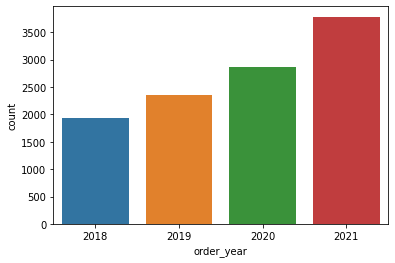

In [ ]:
sns.countplot(data=df,x='order_year')

## 월별로 주문량 확인

In [ ]:
df_order_month=df['order_month'].value_counts().sort_index()
df_order_month

1      652
2      529
3      597
4      527
5     1011
6     1171
7      606
8     1148
9     1068
10    1192
11    1193
12    1239
Name: order_month, dtype: int64

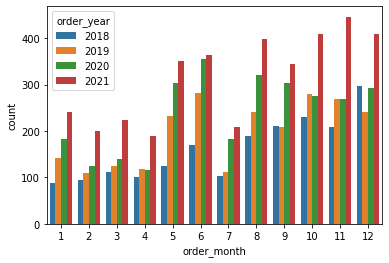

In [ ]:
sns.countplot(data=df,x='order_month',hue='order_year')

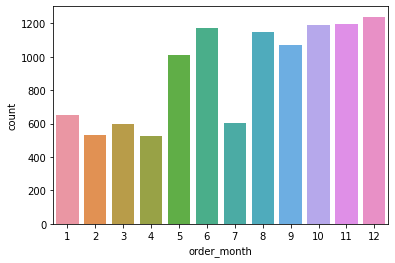

In [ ]:
sns.countplot(data=df,x='order_month')

## 요일별 주문량 확인

In [ ]:
df_order_weekday=df['order_weekday'].value_counts().sort_index()
df_order_weekday

Fri    1972
Mon    1480
Sat    1928
Sun    1966
The     550
Thu    1943
Wed    1094
Name: order_weekday, dtype: int64

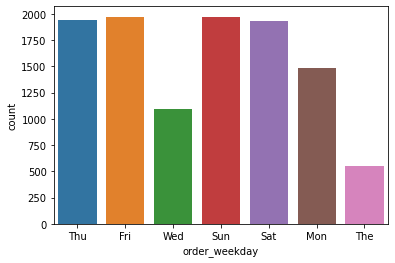

In [ ]:
sns.countplot(data=df,x='order_weekday')

In [ ]:
df_order_weekday.index

Index(['Fri', 'Mon', 'Sat', 'Sun', 'The', 'Thu', 'Wed'], dtype='object')

In [ ]:
df.columns

Index(['행 ID', '주문 ID', '배송 형태', '고객 ID', '고객 이름', '세그먼트', '도시', '시/도',
       '국가/지역', '지역', '제품 ID', '범주', '하위 범주', '제품 이름', '매출', '수량', '할인율', '수익',
       'order_year', 'order_month', 'order_day', 'delivery_year',
       'delivery_month', 'delivery_day', 'delivery_weekday', 'order_weekday'],
      dtype='object')

In [ ]:
df.groupby('order_weekday').sum()[['매출','수량','수익']]

,매출,수량,수익
order_weekday,,,
Fri,621403.1559,7286,65900.5659
Mon,497504.1969,5744,61999.8969
Sat,641607.4254,7304,82600.5954
Sun,650838.9516,7336,83750.4816
The,178183.3071,2048,20693.9571
Thu,634015.3743,7294,75931.7443
Wed,342887.6478,4010,41177.1378


In [ ]:
weekday_revenue=df.groupby('order_weekday').sum()[['수량','수익']]

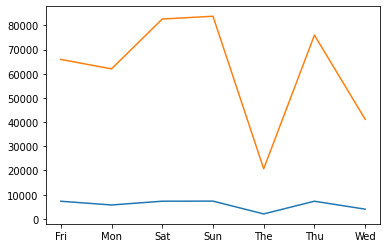

In [ ]:
plt.plot(weekday_revenue)

In [ ]:
df.groupby('order_year').sum()[['매출','수량','수익']]

,매출,수량,수익
order_year,,,
2018,6.379640e+05,7214,82744.6554
2019,7.581064e+05,8667,88201.5924
2020,9.643315e+05,10902,121826.4576
2021,1.206038e+06,14239,139281.6736


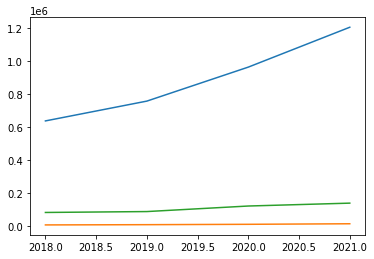

In [ ]:
year_revenue=df.groupby('order_year').sum()[['매출','수량','수익']]
plt.plot(year_revenue)

In [ ]:
df.groupby('order_month').sum()[['매출','수량','수익']]

,매출,수량,수익
order_month,,,
1,215500.0758,2427,20349.9558
2,177618.9021,2008,18034.6521
3,205233.3201,2284,27956.3601
4,162393.3198,1935,17644.6098
5,297831.2253,3813,37994.6253
6,380418.1311,4321,50310.0111
7,187659.8544,2236,18441.6144
8,388060.9800,4383,40968.4800
9,330329.3349,4000,41771.8749


## 고객ID별로 주문량 확인

In [ ]:
df['고객 ID'].value_counts()[:10]

JG-15805    40
AF-10870    36
BW-11110    35
CS-12175    35
NH-18610    35
BE-11335    34
BM-11785    34
MG-17680    33
EM-13960    32
VT-21700    32
Name: 고객 ID, dtype: int64

In [ ]:
df['고객 이름'].value_counts()[:10]

John Grady           40
Art Ferguson         36
Nicole Hansen        35
Bart Watters         35
Charles Sheldon      35
Bill Eplett          34
Bryan Mills          34
Maureen Gastineau    33
Eric Murdock         32
Valerie Takahito     32
Name: 고객 이름, dtype: int64

## 국가별 주문량

In [ ]:
df['국가/지역'].value_counts()

Australia           2837
China               1899
India               1490
Indonesia           1388
Philippines          681
New Zealand          628
Thailand             295
Vietnam              265
Japan                250
Pakistan             249
Malaysia             176
South Korea          172
Bangladesh           163
Singapore            141
Myanmar (Burma)      136
Afghanistan           55
Cambodia              45
Papua New Guinea      22
Nepal                 19
Taiwan                14
Sri Lanka              7
Mongolia               1
Name: 국가/지역, dtype: int64

In [ ]:
df.columns

Index(['행 ID', '주문 ID', '배송 형태', '고객 ID', '고객 이름', '세그먼트', '도시', '시/도',
       '국가/지역', '지역', '제품 ID', '범주', '하위 범주', '제품 이름', '매출', '수량', '할인율', '수익',
       'order_year', 'order_month', 'order_day', 'delivery_year',
       'delivery_month', 'delivery_day', 'delivery_weekday', 'order_weekday'],
      dtype='object')

In [ ]:
df['지역'].value_counts()

오세아니아    3487
동남아시아    3127
북아시아     2336
중앙아시아    1983
Name: 지역, dtype: int64

원그래프로

In [ ]:
df['도시'].value_counts()[:10]

Manila              432
Jakarta             337
Sydney              291
Bangkok             287
Perth               250
Brisbane            249
Melbourne           234
Rockhampton         220
Auckland            196
Ho Chi Minh City    179
Name: 도시, dtype: int64

In [ ]:
df['시/도'].value_counts()[:10]

New South Wales      781
Queensland           717
Metro Manila         561
Victoria             491
Jakarta              337
Western Australia    312
Maharashtra          290
Bangkok              287
Guangdong            284
Jawa Barat           284
Name: 시/도, dtype: int64

In [ ]:
df.groupby('국가/지역').sum()[['매출','수량','수익']].sort_values('수익',ascending=False)[:10]

,매출,수량,수익
국가/지역,,,
China,706579.1850,7145,152230.5750
India,570791.6850,5564,125103.2850
Australia,925235.8530,10673,103907.4330
Japan,100787.5170,996,24328.4670
Bangladesh,78256.4700,680,19430.8900
New Zealand,172020.6240,2089,16600.2840
Malaysia,61362.2100,676,16329.9600
Indonesia,404571.6879,5233,15642.1779
Singapore,40286.2500,554,8853.0600


In [ ]:
df.groupby('국가/지역').sum()[['수익']].sort_values('수익',ascending=False)

,수익
국가/지역,
China,152230.5750
India,125103.2850
Australia,103907.4330
Japan,24328.4670
Bangladesh,19430.8900
New Zealand,16600.2840
Malaysia,16329.9600
Indonesia,15642.1779
Singapore,8853.0600


## 제품별 판매량

In [ ]:
df['제품 이름'].value_counts()[:10]

Stockwell Paper Clips, Assorted Sizes                 26
Cardinal Index Tab, Clear                             24
Eldon File Cart, Single Width                         20
Hon Executive Leather Armchair, Adjustable            19
Ibico Index Tab, Clear                                17
Enermax Numeric Keypad, Bluetooth                     17
Office Star Executive Leather Armchair, Adjustable    17
Stockwell Push Pins, 12 Pack                          17
Advantus Paper Clips, Assorted Sizes                  17
Stockwell Thumb Tacks, 12 Pack                        16
Name: 제품 이름, dtype: int64

In [ ]:
df.groupby('제품 이름').sum()[['매출','수량','수익']].sort_values('수익',ascending=False)[:10]

,매출,수량,수익
제품 이름,,,
"Motorola Smart Phone, Full Size",34261.5270,59,7616.9670
"Office Star Executive Leather Armchair, Black",15289.6353,37,6123.2553
"삼성 Smart Phone, VoIP",16796.7360,31,5356.8060
"Nokia Smart Phone, with Caller ID",30808.2402,54,5277.0402
"Novimex Executive Leather Armchair, Adjustable",18832.2576,46,5047.9176
"Sauder Classic Bookcase, Metal",12105.5100,32,4859.4300
"Hewlett Wireless Fax, Color",10609.3140,29,4854.2640
"Sauder Classic Bookcase, Traditional",15521.2440,39,4808.7240
"Apple Smart Phone, with Caller ID",10608.3960,18,4741.2960


In [ ]:
df.groupby('제품 이름').sum()[['수익']].sort_values('수익',ascending=False)[:10]

,수익
제품 이름,
"Motorola Smart Phone, Full Size",7616.9670
"Office Star Executive Leather Armchair, Black",6123.2553
"삼성 Smart Phone, VoIP",5356.8060
"Nokia Smart Phone, with Caller ID",5277.0402
"Novimex Executive Leather Armchair, Adjustable",5047.9176
"Sauder Classic Bookcase, Metal",4859.4300
"Hewlett Wireless Fax, Color",4854.2640
"Sauder Classic Bookcase, Traditional",4808.7240
"Apple Smart Phone, with Caller ID",4741.2960


In [ ]:
df['범주'].value_counts()[:10]

사무용품    6137
가구      2415
기술      2381
Name: 범주, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_

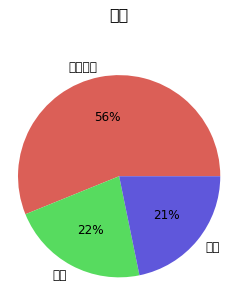

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(df['범주'].value_counts()[:10],
       labels=df['범주'].value_counts()[:10].index,
       autopct='%d%%',
        colors=sns.color_palette('hls',len(df['범주'].value_counts()[:10].index)),
       textprops={'fontsize':12})
plt.axis('equal')
plt.title("범주", fontsize=16, pad=50)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_

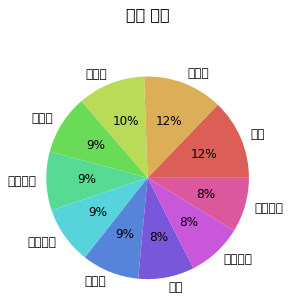

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(df['하위 범주'].value_counts()[:10],
       labels=df['하위 범주'].value_counts()[:10].index,
       autopct='%d%%',
        colors=sns.color_palette('hls',len(df['하위 범주'].value_counts()[:10].index)),
       textprops={'fontsize':12})
plt.axis('equal')
plt.title("하위 범주", fontsize=16, pad=50)
plt.show()

원그래프로

In [ ]:
df['하위 범주'].value_counts()

의자        964
바인더       958
보관함       811
레이블       713
사무용품      705
액세서리      693
전화기       686
용지        673
미술용품      662
잠금장치      657
복사기       649
사무용 집기    644
봉투        620
책장        618
사무기기      353
가전 제품     338
테이블       189
Name: 하위 범주, dtype: int64

In [ ]:
df.groupby('하위 범주').sum()[['매출','수량','수익']].sort_values('수익',ascending=False)[:10]

,매출,수량,수익
하위 범주,,,
전화기,483482.2362,2623,80886.3162
복사기,492851.0352,2379,80300.3052
책장,500443.5885,2340,67231.2285
의자,508739.6082,3577,61192.1682
가전 제품,307620.7290,1310,42128.7090
사무기기,189253.6401,1348,26129.6901
보관함,214569.1614,3043,24458.5714
사무용 집기,100936.9419,2458,16122.8619
액세서리,185258.5545,2599,15639.1545


## 수익

In [ ]:
df['수익'].sort_values(ascending=False)[:10]

7377     2939.310
2904     2817.990
10596    2447.100
965      2316.510
5474     2097.030
9232     1722.480
563      1644.030
7071     1602.990
3999     1594.890
574      1554.432
Name: 수익, dtype: float64

## 할인율

In [ ]:
df['할인율'].value_counts()

0.00    4621
0.10    2203
0.17     735
0.47     725
0.40     712
0.50     449
0.27     388
0.45     314
0.25     198
0.07     150
0.20      92
0.15      82
0.35      77
0.37      74
0.30      62
0.60      18
0.57      12
0.80      11
0.55      10
Name: 할인율, dtype: int64

In [ ]:
df.groupby(['수익','제품 이름','고객 이름']).sum().sort_index(ascending=False)[:10]

,,,행 ID,매출,수량,할인율,order_year,order_month,order_day,delivery_year,delivery_month,delivery_day
수익,제품 이름,고객 이름,,,,,,,,,,
2939.310,"삼성 Smart Phone, VoIP",Carol Adams,7426,6998.640,11,0.00,2018,2,10,2018,2,15
2817.990,"Apple Smart Phone, with Caller ID",Cynthia Arntzen,2918,5751.540,9,0.00,2020,6,13,2020,6,18
2447.100,"Motorola Smart Phone, Full Size",Ann Steele,10664,6439.800,10,0.00,2020,12,17,2020,12,21
2316.510,"Sauder Classic Bookcase, Metal",Maria Bertelson,969,5486.670,14,0.10,2021,6,24,2021,6,28
2097.030,"Sauder Classic Bookcase, Traditional",Vivek Grady,5501,5667.870,13,0.00,2021,9,26,2021,9,28
1722.480,"Cuisinart Stove, Red",Meg O'Connel,9299,4306.320,8,0.00,2021,10,31,2021,11,4
1644.030,"KitchenAid Stove, Silver",Daniel Raglin,567,4624.290,9,0.10,2018,6,8,2018,6,12
1602.990,"Nokia Smart Phone, Cordless",Dean percer,7113,5725.350,9,0.00,2018,11,12,2018,11,16
1594.890,"Bush Classic Bookcase, Metal",Cari Sayre,4023,3709.260,9,0.00,2020,1,26,2020,1,31


In [ ]:
df.groupby(['수익','제품 이름','고객 이름']).sum().sort_index(ascending=True)[:10]

,,,행 ID,매출,수량,할인율,order_year,order_month,order_day,delivery_year,delivery_month,delivery_day
수익,제품 이름,고객 이름,,,,,,,,,,
-3009.4350,"Apple Smart Phone, Full Size",Skye Norling,9219,3499.1550,11,0.50,2020,9,15,2020,9,15
-2380.3500,"Hon Conference Table, Rectangular",Nat Carroll,6390,1286.6700,7,0.80,2021,5,23,2021,5,25
-1736.2800,"Breville Microwave, Silver",Michael Granlund,5411,2117.2200,14,0.50,2021,1,19,2021,1,23
-1479.1260,"Ikea Library with Doors, Traditional",Raymond Buch,4638,2398.3740,11,0.40,2018,11,16,2018,11,20
-1294.3503,"Barricks Computer Table, Fully Assembled",Tracy Hopkins,248,1854.9297,9,0.57,2019,12,27,2019,12,29
-1218.3840,"Chromcraft Round Table, Fully Assembled",Bruce Geld,3459,374.8560,4,0.80,2018,9,1,2018,9,5
-1195.2387,"Lesro Training Table, Adjustable Height",Justin Deggeller,6039,1048.7313,9,0.57,2021,12,31,2022,1,3
-1097.2800,"Hon Executive Leather Armchair, Black",Yana Sorensen,2962,1371.4200,6,0.50,2020,4,10,2020,4,14
-1094.3400,"Apple Smart Phone, Full Size",Mike Pelletier,6417,1272.4200,4,0.50,2021,8,20,2021,8,24


In [ ]:
df.groupby('고객 이름').sum()[['매출','수량','수익']].sort_values('수익',ascending=False)[:10]

,매출,수량,수익
고객 이름,,,
Cynthia Arntzen,11494.0080,42,4045.8780
Carol Adams,11652.5706,53,3220.0506
Bill Eplett,10729.9530,155,3112.9230
Carlos Daly,7582.8414,52,3107.5914
Denny Ordway,9100.2420,49,3056.2920
Cari Sayre,16654.4916,101,2995.5816
Jamie Frazer,10692.6765,91,2813.2965
Vivek Grady,15653.4378,67,2748.1878
Harold Dahlen,10483.3632,63,2700.2832


## 스토어에서 구매한 횟수

In [ ]:
df.groupby('고객 이름').count()[['수익']].sort_values('수익',ascending=False)[:10]

,수익
고객 이름,
John Grady,40
Art Ferguson,36
Bart Watters,35
Nicole Hansen,35
Charles Sheldon,35
Bill Eplett,34
Bryan Mills,34
Maureen Gastineau,33
Valerie Takahito,32


In [ ]:
df.groupby('고객 이름').sum()[['수익']].sort_values('수익',ascending=False)[:10]

## 주문날짜와 배송날짜 차이

In [ ]:
df['order_delivery']=df['delivery_day']-df['order_day']

In [ ]:
df['order_delivery'].mean()

0.06183115338882283

잘못된 정보가 기입되어있음. 평균값이 1보다 작다는 것은 마이너스 값이 있다는것'

In [ ]:
df['order_delivery'].sort_values()

6200   -30
8688   -30
8689   -30
8795   -30
3194   -29
        ..
7127     7
7126     7
2474     7
5555     7
3814     7
Name: order_delivery, Length: 10933, dtype: int64

In [ ]:
df.head(3)

,행 ID,주문 ID,배송 형태,고객 ID,고객 이름,세그먼트,도시,시/도,국가/지역,지역,제품 ID,범주,하위 범주,제품 이름,매출,수량,할인율,수익,order_year,order_month,order_day,delivery_year,delivery_month,delivery_day,delivery_weekday,order_weekday,order_delivery
0,1,IN-2020-27828,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,OFF-PA-10000026,사무용품,용지,"Eaton Cards & Envelopes, 8.5 x 11",197.28,4,0.0,35.40,2020,8,27,2020,8,31,Mon,Thu,4
1,2,IN-2020-27828,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,FUR-FU-10000944,가구,사무용 집기,"Tenex Door Stop, Black",307.23,7,0.0,21.42,2020,8,27,2020,8,31,Mon,Thu,4
2,3,IN-2020-27828,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,TEC-CO-10002526,기술,복사기,"Sharp Wireless Fax, Digital",1422.24,4,0.0,526.20,2020,8,27,2020,8,31,Mon,Thu,4


확인해보니 역시나 있었다

## 수익,매출에 관한 

In [ ]:
df['수익'].sum()

432054.3790000001

In [ ]:
df['수익'].mean()

39.518373639440235

In [ ]:
df['매출'].sum()

3566440.059

In [ ]:
df['매출'].mean()

326.20873127229464

## 총 수량

In [ ]:
df['수량'].sum()

41022

In [ ]:
df['수량'].mean()

3.752126589225281

In [ ]:
heat_df=df.drop(['행 ID','주문 ID','제품 ID'],inplace=True,axis=1)

,배송 형태,고객 ID,고객 이름,세그먼트,도시,시/도,국가/지역,지역,범주,하위 범주,제품 이름,매출,수량,할인율,수익,order_year,order_month,order_day,delivery_year,delivery_month,delivery_day,delivery_weekday,order_weekday,order_delivery
0,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,사무용품,용지,"Eaton Cards & Envelopes, 8.5 x 11",197.280,4,0.00,35.400,2020,8,27,2020,8,31,Mon,Thu,4
1,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,가구,사무용 집기,"Tenex Door Stop, Black",307.230,7,0.00,21.420,2020,8,27,2020,8,31,Mon,Thu,4
2,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,기술,복사기,"Sharp Wireless Fax, Digital",1422.240,4,0.00,526.200,2020,8,27,2020,8,31,Mon,Thu,4
3,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,China,북아시아,기술,액세서리,"Memorex Keyboard, Erganomic",207.450,3,0.00,78.750,2020,8,27,2020,8,31,Mon,Thu,4
4,표준 등급,SO-20335,Sean O'Donnell,일반 소비자,Marikina,Metro Manila,Philippines,동남아시아,사무용품,가전 제품,"KitchenAid Coffee Grinder, Silver",121.074,2,0.15,37.014,2021,6,24,2021,6,30,Wed,Thu,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10928,표준 등급,EM-13810,Eleni McCrary,기업,Wellington,Wellington,New Zealand,오세아니아,사무용품,보관함,"Smead Lockers, Blue",396.840,2,0.00,59.520,2020,9,11,2020,9,15,The,Fri,4
10929,표준 등급,EM-13810,Eleni McCrary,기업,Wellington,Wellington,New Zealand,오세아니아,기술,복사기,"Brother Wireless Fax, High-Speed",1508.040,4,0.00,437.280,2020,9,11,2020,9,15,The,Fri,4
10930,표준 등급,EM-13810,Eleni McCrary,기업,Wellington,Wellington,New Zealand,오세아니아,사무용품,레이블,"Harbour Creations Round Labels, Alphabetical",6.570,1,0.00,0.630,2020,9,11,2020,9,15,The,Fri,4
10931,당일,PO-19195,Phillina Ober,홈 오피스,Rockhampton,Queensland,Australia,오세아니아,가구,책장,"Safco Classic Bookcase, Pine",1582.200,6,0.40,-870.300,2019,8,29,2019,8,29,Thu,Thu,0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_

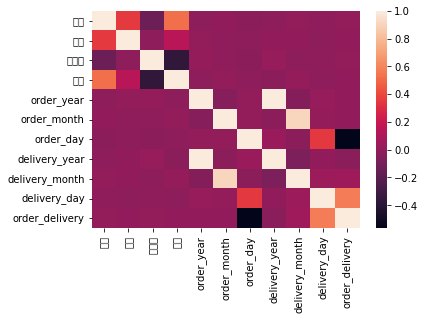

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr()

,매출,수량,할인율,수익,order_year,order_month,order_day,delivery_year,delivery_month,delivery_day,order_delivery
매출,1.000000,0.352296,-0.134551,0.525128,-0.005446,0.005453,-0.010500,-0.006678,0.009544,0.001440,0.010459
수량,0.352296,1.000000,-0.008737,0.148291,0.009182,-0.000435,-0.009321,0.007690,0.005167,-0.006131,0.002765
할인율,-0.134551,-0.008737,1.000000,-0.361027,0.020432,0.000518,-0.011295,0.021201,-0.003880,-0.000689,0.009282
수익,0.525128,0.148291,-0.361027,1.000000,-0.008974,0.012996,-0.008060,-0.010345,0.018345,-0.004472,0.003120
order_year,-0.005446,0.009182,0.020432,-0.008974,1.000000,-0.040035,0.013771,0.993992,-0.041996,0.022885,0.008084
order_month,0.005453,-0.000435,0.000518,0.012996,-0.040035,1.000000,0.011500,-0.020997,0.913983,0.015779,0.003819
order_day,-0.010500,-0.009321,-0.011295,-0.008060,0.013771,0.011500,1.000000,0.034237,-0.014501,0.350997,-0.566541
delivery_year,-0.006678,0.007690,0.021201,-0.010345,0.993992,-0.020997,0.034237,1.000000,-0.067125,0.002626,-0.027661
delivery_month,0.009544,0.005167,-0.003880,0.018345,-0.041996,0.913983,-0.014501,-0.067125,1.000000,0.039283,0.047264
delivery_day,0.001440,-0.006131,-0.000689,-0.004472,0.022885,0.015779,0.350997,0.002626,0.039283,1.000000,0.572752
